In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# set theme
plt.style.use('seaborn')
sns.set_style('darkgrid')

# Probability Integral Transform

In [3]:
X = stats.norm.rvs(size=10000)
X_transformed = stats.norm.cdf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

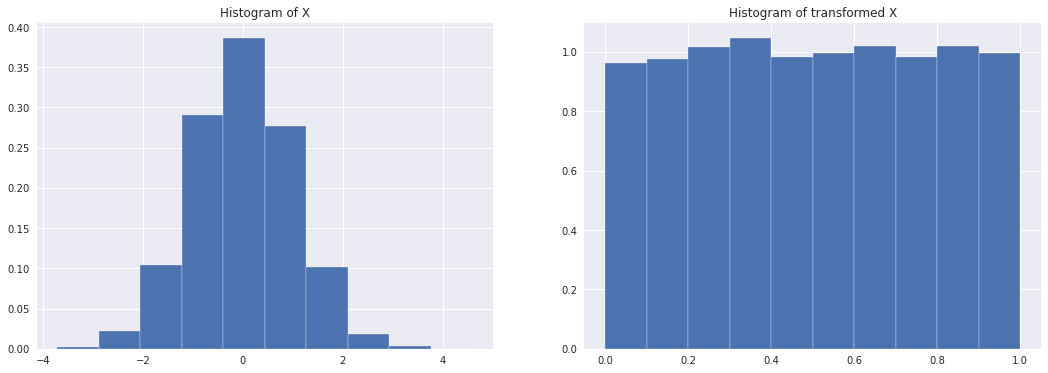

In [4]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

In [5]:
X = stats.uniform.rvs(size=10000)
X_transformed = stats.norm.ppf(X)

Text(0.5, 1.0, 'Histogram of transformed X')

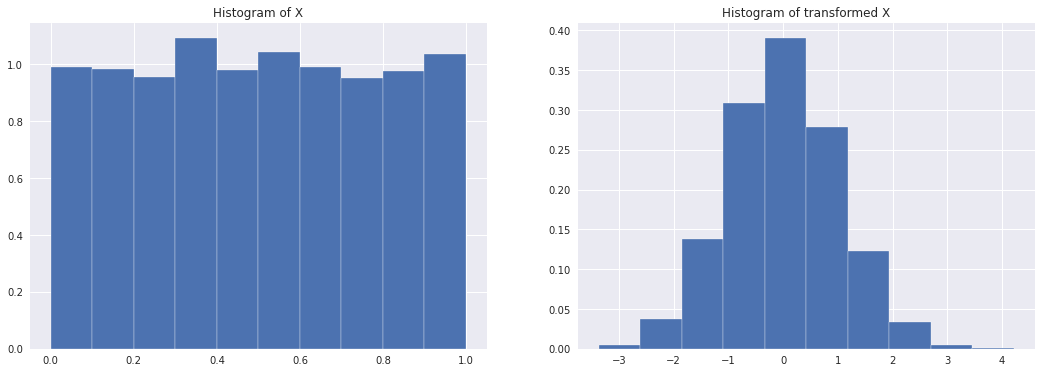

In [6]:
plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(X, density=True, bins=10)
plt.title('Histogram of X')
plt.subplot(122)
plt.hist(X_transformed, density=True, bins=10)
plt.title('Histogram of transformed X')

# Product copula (independent variables)

In [7]:
dist_x = stats.expon()
dist_y = stats.norm()

In [8]:
X = dist_x.rvs(size=10000)
Y = dist_y.rvs(size=10000)

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

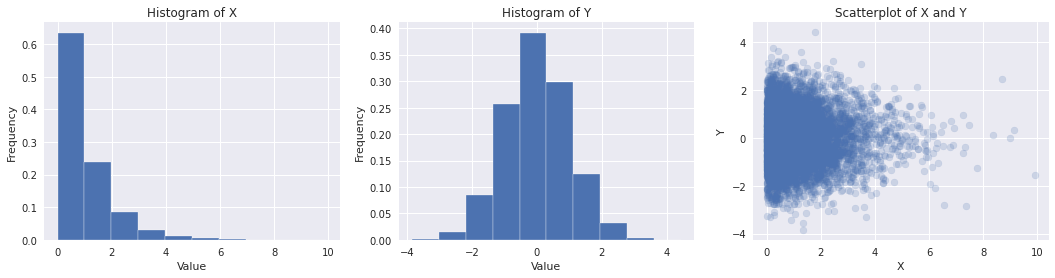

In [9]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X,Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

/tmp/ipykernel_30668/2577003626.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img)


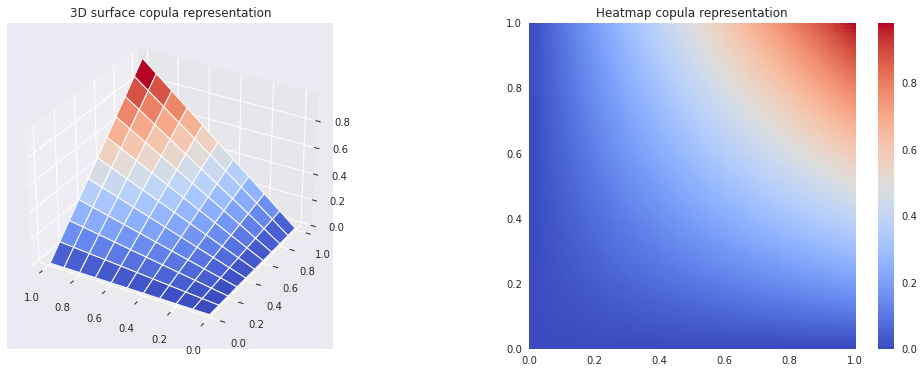

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)

x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
x,y = np.meshgrid(x,y)

# apply inverse CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(dist_x.ppf(x).flatten(),dist_y.ppf(y).flatten())])
# calculate the product of two CDFs for each point on a grid
z = dist_x.cdf(pairs[:,0]).reshape([100,100]) * dist_y.cdf(pairs[:,1]).reshape([100,100])

ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
ax0.invert_yaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

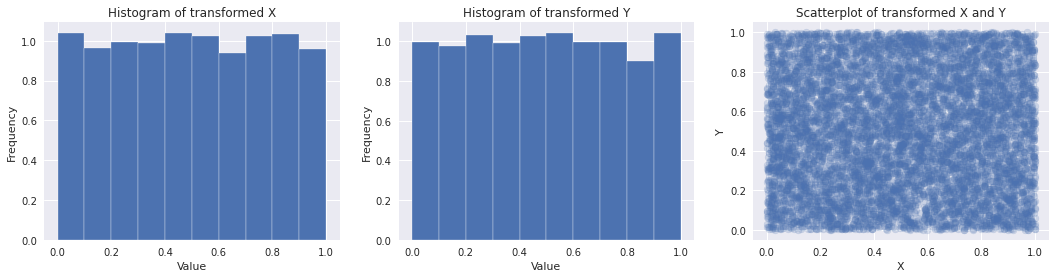

In [11]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(dist_x.cdf(X), density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(dist_y.cdf(Y), density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(dist_x.cdf(X), dist_y.cdf(Y), alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

# Gaussian copula

In [12]:
# define copula parameters
rho = 0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
# define multivariate normal distribution
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
# sample from the distribution
sample_c = dist_c.rvs(size=10000)

In [13]:
# obtain marginals X and Y
X = sample_c[:,0]
Y = sample_c[:,1]

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

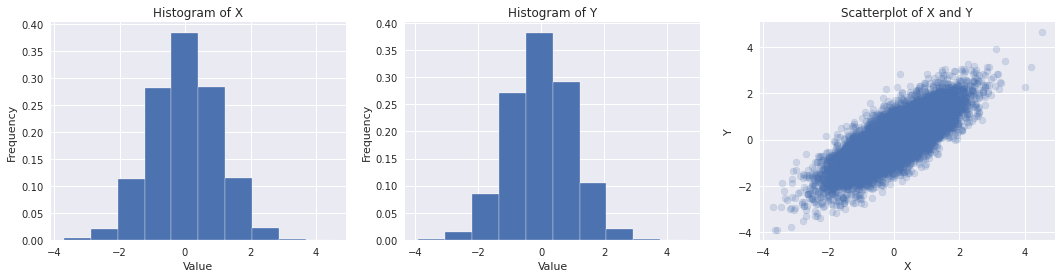

In [14]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

/tmp/ipykernel_30668/508910438.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(img)


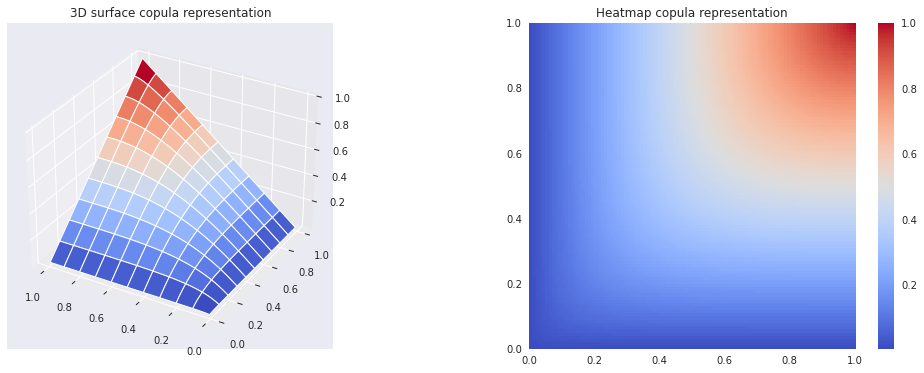

In [15]:
# create a grid
x = np.arange(0.01,1.01,0.01)
y = np.arange(0.01,1.01,0.01)
x,y = np.meshgrid(x,y)

# apply inverse standard normal CDF to each point on a grid
pairs = np.array([[i, j] for (i,j) in zip(stats.norm.ppf(x).flatten(),stats.norm.ppf(y).flatten())])
# calculate the value of bivariate normal CDF for each point on a grid
z = dist_c.cdf(pairs).reshape([100,100])

# plot the resulting copula
fig = plt.figure(figsize=(18,6))
ax0 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(122)
ax0.plot_surface(x, y, z, cmap=cm.coolwarm, rstride=10, cstride=10, linewidth=1)
ax0.invert_yaxis()
ax0.set(title='3D surface copula representation')
img = ax1.imshow(np.flip(z,axis=0), cmap=cm.coolwarm, extent=[0,1,0,1])
ax1.grid(False)
ax1.set(title='Heatmap copula representation')
fig.colorbar(img)

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

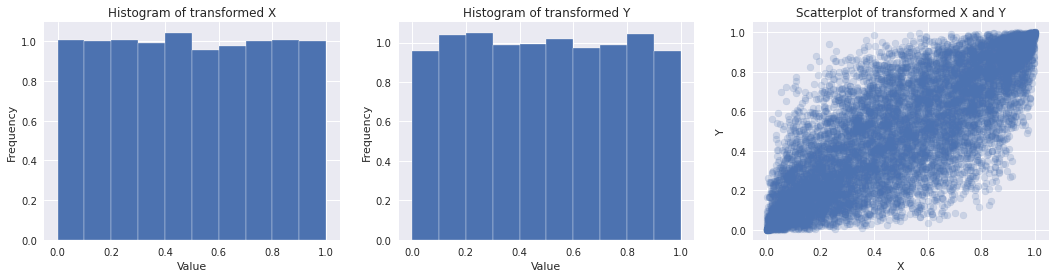

In [16]:
# transform marginals to uniform
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)

# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u_x, density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(u_y, density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u_x, u_y, alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

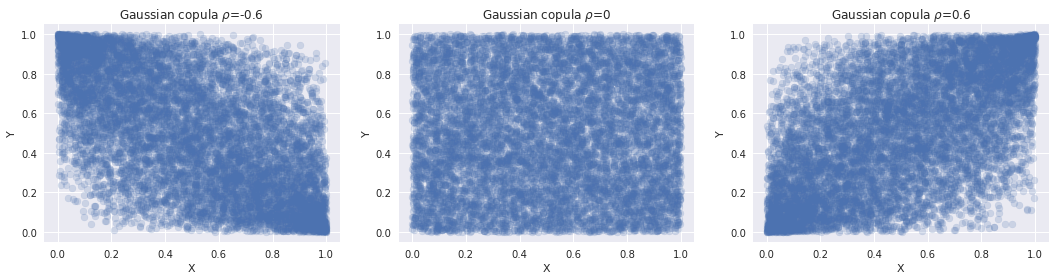

In [17]:
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

for i,rho in zip([0,1,2],[-0.6, 0, 0.6]):
    mu_c = np.array([0,0])
    cov_c = np.array([[1,rho],[rho,1]])
    dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
    sample_c = dist_c.rvs(size=10000)
    
    X = sample_c[:,0]
    Y = sample_c[:,1]
    u_x = stats.norm.cdf(X)
    u_y = stats.norm.cdf(Y)
    ax[i].scatter(u_x, u_y, alpha=0.2)
    ax[i].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

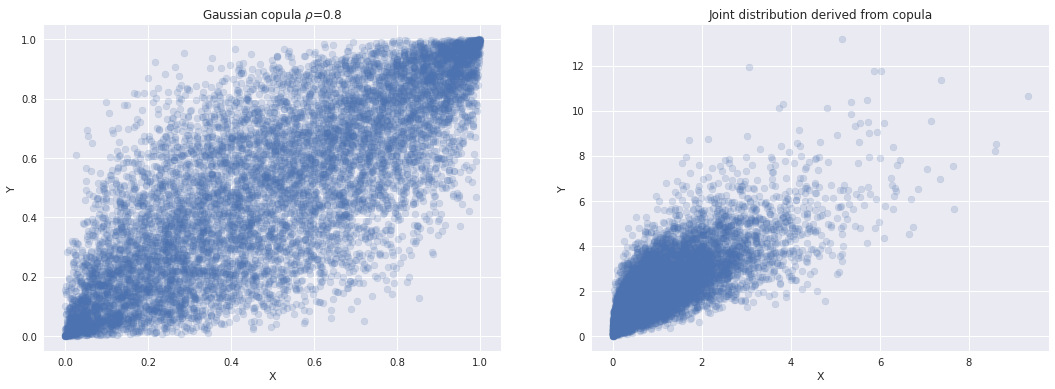

In [18]:
# define copula parameters
rho=0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
sample_c = dist_c.rvs(size=10000)

# transform marginals to uniform
X = sample_c[:,0]
Y = sample_c[:,1]
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')

Text(0.5, 0.98, 'Joint distribution from Gaussian copula ($\\rho=0.8$)')

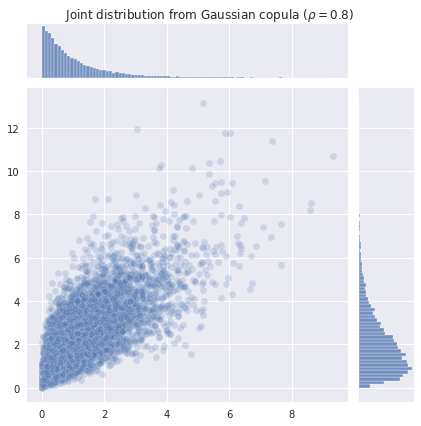

In [19]:
r = sns.jointplot(x=dist_x.ppf(u_x), y=dist_y.ppf(u_y), alpha=0.2)
r.fig.subplots_adjust(top=.94)
r.fig.suptitle(r'Joint distribution from Gaussian copula ($\rho=0.8$)')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

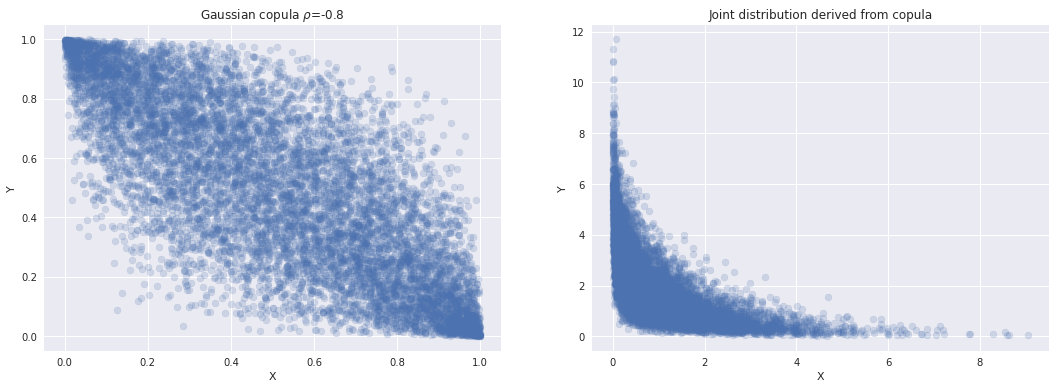

In [20]:
# define copula parameters
rho=-0.8
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_normal(mean=mu_c, cov=cov_c)
sample_c = dist_c.rvs(size=10000)

# transform marginals to uniform
X = sample_c[:,0]
Y = sample_c[:,1]
u_x = stats.norm.cdf(X)
u_y = stats.norm.cdf(Y)
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r'Gaussian copula $\rho$=' + str(rho), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')

# Student's t copula

In [21]:
# set copula parameters
rho = 0.8
nu = 1
# define t distribution
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
dist_c = stats.multivariate_t(loc=mu_c, shape=cov_c, df=nu)
# obtain random sample
sample_c = dist_c.rvs(size=10000)

In [22]:
# obtain marginals X and Y
X = sample_c[:,0]
Y = sample_c[:,1]

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y'),
 (-15.0, 15.0),
 (-15.0, 15.0)]

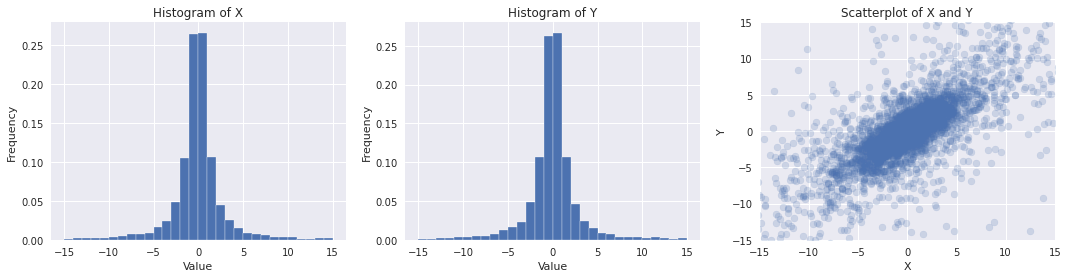

In [23]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True, range=(-15,15), bins=30)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True, range=(-15,15), bins=30)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y', xlim=(-15,15), ylim=(-15,15))

[Text(0.5, 1.0, 'Scatterplot of transformed X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

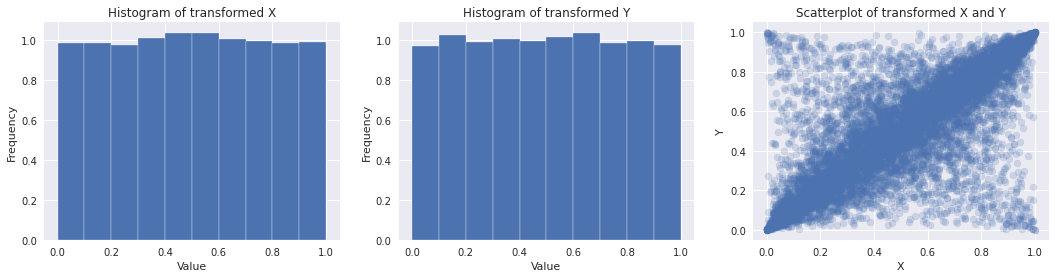

In [24]:
# transform variables to uniform
u_x = stats.t.cdf(X, df=nu)
u_y = stats.t.cdf(Y, df=nu)

# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(u_x, density=True)
ax[0].set(title='Histogram of transformed X', xlabel='Value', ylabel='Frequency')
ax[1].hist(u_y, density=True)
ax[1].set(title='Histogram of transformed Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(u_x, u_y, alpha=0.2)
ax[2].set(title='Scatterplot of transformed X and Y', xlabel='X', ylabel='Y')

[Text(0.5, 1.0, 'Joint distribution derived from copula'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

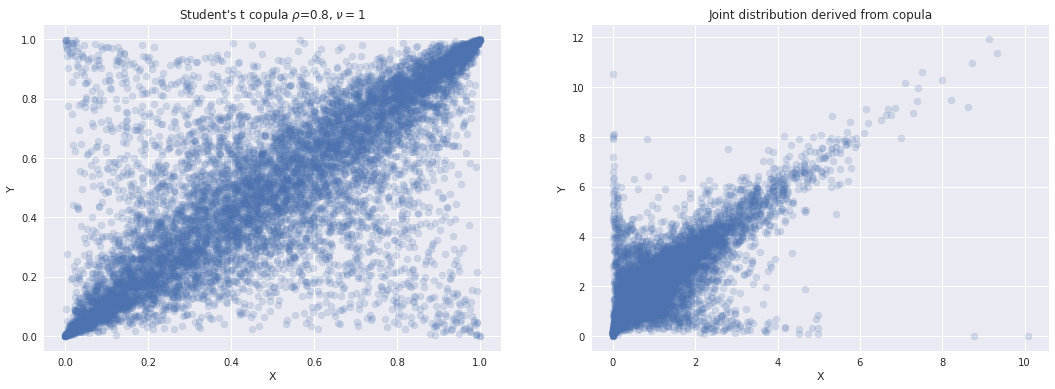

In [25]:
# define required marginal distributions
dist_x = stats.expon()
dist_y = stats.gamma(a=2)

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=2)
ax[0].scatter(u_x, u_y, alpha=0.2)
ax[0].set(title=r"Student's t copula $\rho$=" + str(rho) + r', $\nu=$' + str(nu), xlabel='X', ylabel='Y')
ax[1].scatter(dist_x.ppf(u_x), dist_y.ppf(u_y), alpha=0.2)
ax[1].set(title='Joint distribution derived from copula', xlabel='X', ylabel='Y')

Text(0.5, 0.98, "Joint distribution from Student's t copula ($\\rho=0.8, \\nu=1$)")

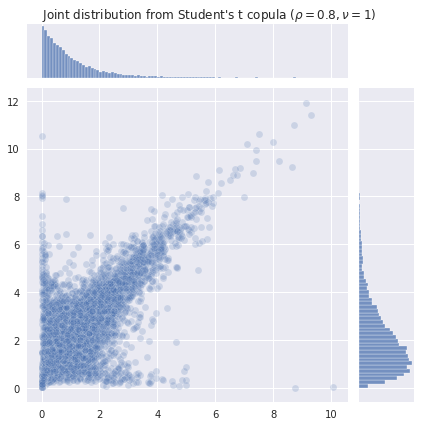

In [26]:
r = sns.jointplot(x=dist_x.ppf(u_x), y=dist_y.ppf(u_y), alpha=0.2)
r.fig.subplots_adjust(top=.94)
r.fig.suptitle(r"Joint distribution from Student's t copula ($\rho=0.8, \nu=1$)")

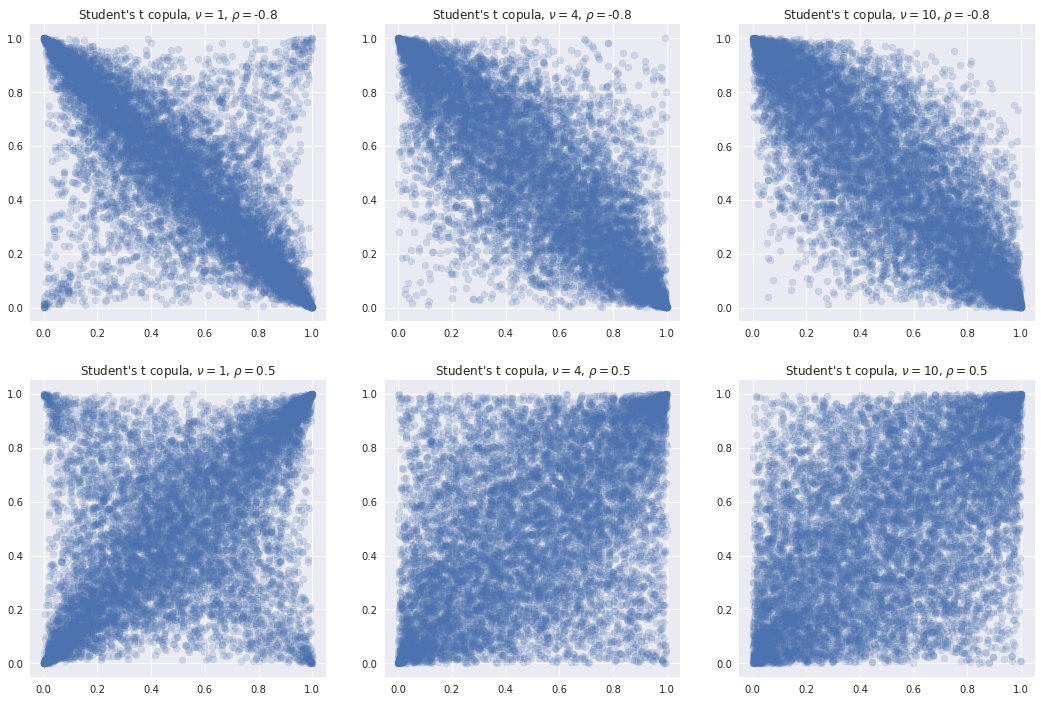

In [27]:
fig, ax = plt.subplots(figsize=(18,12), nrows=2, ncols=3)

rhos = [-0.8, 0.5]
nus = [1, 4, 10]

for i,rho in enumerate(rhos):
    for j,nu in enumerate(nus):
        
        # define t distribution
        mu_c = np.array([0,0])
        cov_c = np.array([[1,rho],[rho,1]])
        dist_c = stats.multivariate_t(loc=mu_c, shape=cov_c, df=nu)
        
        # obtain random sample
        sample_c = dist_c.rvs(size=10000)
        
        # obtain marginals X and Y
        X = sample_c[:,0]
        Y = sample_c[:,1]
        
        # transform variables to uniform
        u_x = stats.t.cdf(X, df=nu)
        u_y = stats.t.cdf(Y, df=nu)

        # plot copula
        ax[i,j].scatter(u_x, u_y, alpha=0.2)
        ax[i,j].set(title=r"Student's t copula, $\nu=$" + str(nu) + r", $\rho=$" + str(rho))

# Gaussian copula, Gaussian marginals example 1

In [28]:
# generate data
n = 10000
X = np.random.randn(n)
Y = 1.6*X + np.random.randn(n)

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

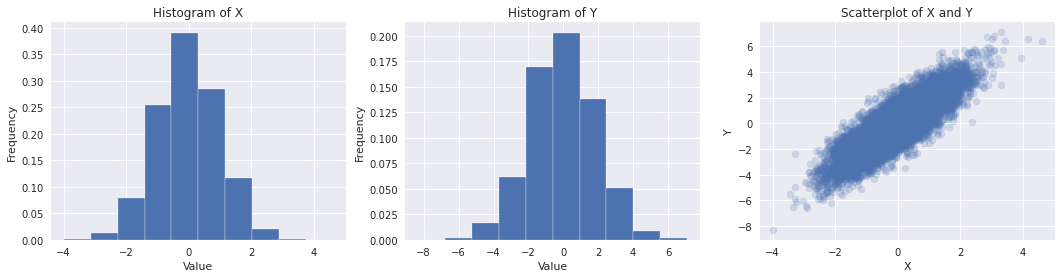

In [29]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

In [30]:
np.corrcoef(X,Y)

array([[1.        , 0.84699052],
       [0.84699052, 1.        ]])

In [31]:
# determine parameters of marginals and correlation coefficient
mu_x, std_x = np.mean(X), np.std(X)
mu_y, std_y = np.mean(Y), np.std(Y)
dist_x = stats.norm(loc=mu_x, scale=std_x)
dist_y = stats.norm(loc=mu_y, scale=std_y)
rho = np.corrcoef(X,Y)[0,1]

In [32]:
# construct Gaussian copula
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
C = stats.multivariate_normal(mean=mu_c, cov=cov_c)
C_sample = C.rvs(size=n)

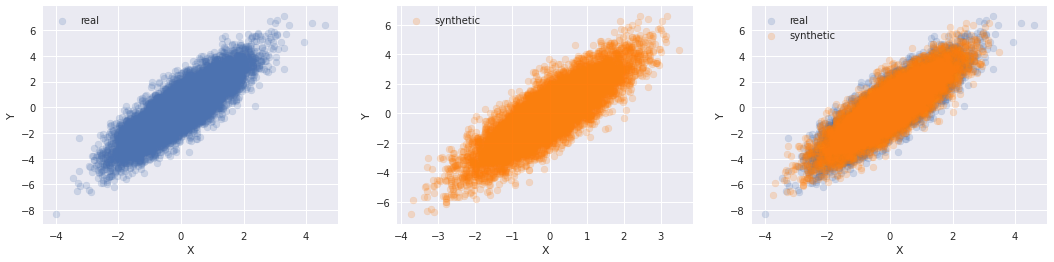

In [33]:
# plot real data and simulated data from copula
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

ax[0].scatter(X, Y, alpha=0.2, label='real')
ax[0].set(xlabel='X', ylabel='Y')
ax[0].legend()

ax[1].scatter(dist_x.ppf(stats.norm.cdf(C_sample[:,0])), 
              dist_y.ppf(stats.norm.cdf(C_sample[:,1])), 
              alpha=0.2, label='synthetic', c='tab:orange')
ax[1].set(xlabel='X', ylabel='Y')
ax[1].legend()

ax[2].scatter(X,Y, alpha=0.2, label='real')
ax[2].scatter(dist_x.ppf(stats.norm.cdf(C_sample[:,0])), 
              dist_y.ppf(stats.norm.cdf(C_sample[:,1])), 
              alpha=0.2, label='synthetic', c='tab:orange')
ax[2].set(xlabel='X', ylabel='Y')
ax[2].legend()

# Gaussian copula, Gaussian marginals example 2

In [34]:
# generate data
n = 10000
X = np.random.randn(n)
Z = np.random.randn(n)
Y = np.ones(n)
condition = (((X<0) & (Z>=0)) | ((X>0) & (Z<=0)))
Y[condition] = -Z[condition]
Y[~condition] = Z[~condition]

[Text(0.5, 1.0, 'Scatterplot of X and Y'),
 Text(0.5, 0, 'X'),
 Text(0, 0.5, 'Y')]

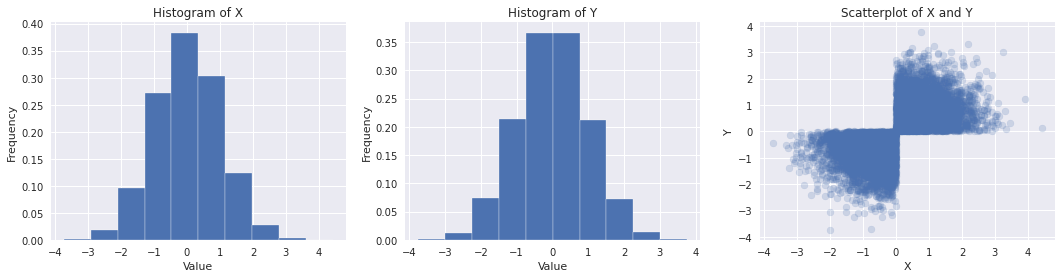

In [35]:
# plot marginals and joint distribution
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)
ax[0].hist(X, density=True)
ax[0].set(title='Histogram of X', xlabel='Value', ylabel='Frequency')
ax[1].hist(Y, density=True)
ax[1].set(title='Histogram of Y', xlabel='Value', ylabel='Frequency')
ax[2].scatter(X, Y, alpha=0.2)
ax[2].set(title='Scatterplot of X and Y', xlabel='X', ylabel='Y')

In [36]:
np.corrcoef(X,Y)

array([[1.       , 0.6385013],
       [0.6385013, 1.       ]])

In [37]:
# determine parameters of marginals and correlation coefficient
mu_x, std_x = np.mean(X), np.std(X)
mu_y, std_y = np.mean(Y), np.std(Y)
dist_x = stats.norm(loc=mu_x, scale=std_x)
dist_y = stats.norm(loc=mu_y, scale=std_y)
rho = np.corrcoef(X,Y)[0,1]

In [38]:
# construct Gaussian copula
mu_c = np.array([0,0])
cov_c = np.array([[1,rho],[rho,1]])
C = stats.multivariate_normal(mean=mu_c, cov=cov_c)
C_sample = C.rvs(size=n)

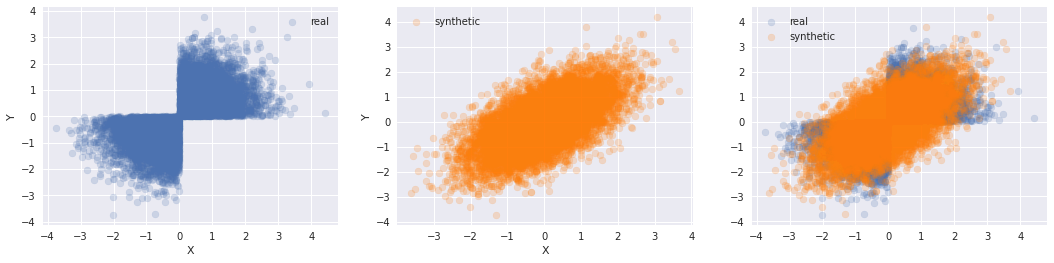

In [39]:
# plot real data and simulated data from copula
fig, ax = plt.subplots(figsize=(18,4), nrows=1, ncols=3)

ax[0].scatter(X, Y, alpha=0.2, label='real')
ax[0].set(xlabel='X', ylabel='Y')
ax[0].legend()

ax[1].scatter(dist_x.ppf(stats.norm.cdf(C_sample[:,0])), 
              dist_y.ppf(stats.norm.cdf(C_sample[:,1])), 
              alpha=0.2, label='synthetic', c='tab:orange')
ax[1].set(xlabel='X', ylabel='Y')
ax[1].legend()

ax[2].scatter(X,Y, alpha=0.2, label='real')
ax[2].scatter(dist_x.ppf(stats.norm.cdf(C_sample[:,0])), 
              dist_y.ppf(stats.norm.cdf(C_sample[:,1])), 
              alpha=0.2, label='synthetic', c='tab:orange')
ax[2].legend()